In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/', force_remount=True)

In [ ]:
import os
os.chdir("/content/gdrive/MyDrive/Usc/EE641/Project/")
print("current working directory is ", os.getcwd())

In [ ]:
!pip install torchio
!pip install yacs

In [10]:
import torch
from torch.utils.data import DataLoader
from torchvision import transforms
from utils import HDF5Dataset, test_loop
import matplotlib.pyplot as plt

In [2]:
device = (torch.device('cuda') if torch.cuda.is_available()
                  else torch.device('cpu'))

In [3]:
infect_path = "HDF5Data/infect_data.hdf5"
test_transforms = transforms.Compose([transforms.ToTensor()])
infect_test_dataset = HDF5Dataset(infect_path, 'test', transform=test_transforms)
infect_test_loader = DataLoader(infect_test_dataset, batch_size=1, num_workers=2)

In [6]:
test_infect_Unet_micronet_m0 = torch.load('trained_models/infect_Unet_micronet_m0.pt', map_location=torch.device('cpu'))
test_loop(test_infect_Unet_micronet_m0, infect_test_loader, 
mask_name='infection mask', device=device)

accuracy mean: 0.899, accuracy standard deviation: 0.065
IoU mean: 0.268, IoU standard deviation: 0.238
DSC mean: 0.369, DSC standard deviation: 0.291


(0.8994360566139221,
 0.06508044898509979,
 0.2679540514945984,
 0.237517312169075,
 0.36877474188804626,
 0.29133930802345276)

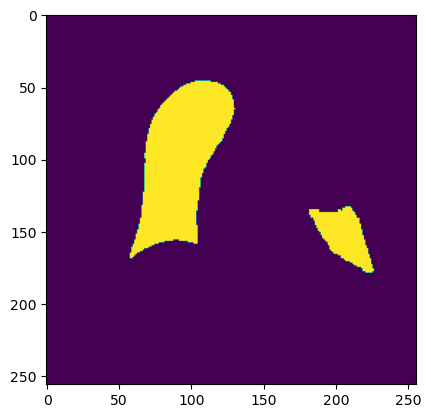

In [12]:
plt.imshow(infect_test_dataset[0][1])

In [16]:
output = test_infect_Unet_micronet_m0(infect_test_dataset[0][0].unsqueeze(0))
_, predicted = torch.max(output, dim=1)
predicted.shape

torch.Size([1, 256, 256])

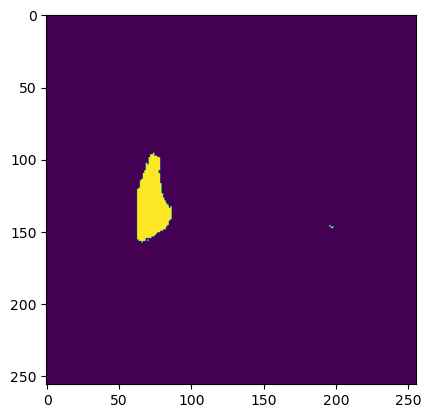